# Playing Card Detection and Identification
[Paper Link](https://web.stanford.edu/class/ee368/Project_Winter_1819/Reports/snyder.pdf)

### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [388]:
images_folder = 'Images'
test_image = 'Images/cards1.png'

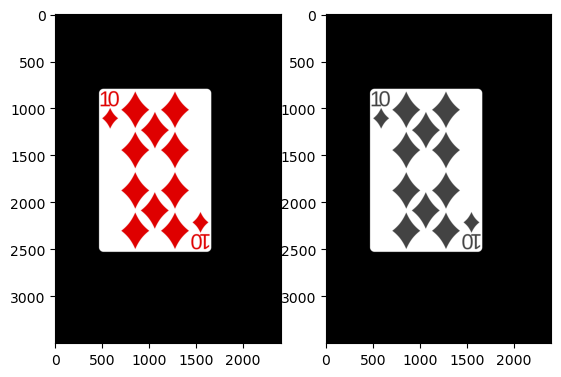

In [389]:
card = cv2.imread(test_image)
card = cv2.cvtColor(card, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(card, cv2.COLOR_RGB2GRAY)

fig, axes = plt.subplots(1, 2)
axes[0].imshow(card)
axes[1].imshow(gray, cmap='gray')

## Method 1 -  Scale invariant Feature Transform (SIFT)

[ WARN:0@17360.523] global /croot/opencv-suite_1691620365762/work/opencv_contrib-4.6.0/modules/xfeatures2d/misc/python/shadow_sift.hpp (13) SIFT_create DEPRECATED: cv.xfeatures2d.SIFT_create() is deprecated due SIFT tranfer to the main repository. https://github.com/opencv/opencv/issues/16736


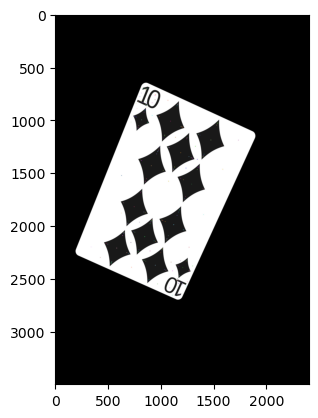

In [373]:
gray1 = cv2.cvtColor(card, cv2.COLOR_BGR2GRAY)

#keypoints
sift = cv2.xfeatures2d.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(card,None)

img_1 = cv2.drawKeypoints(gray1,keypoints_1,card)
plt.imshow(img_1)

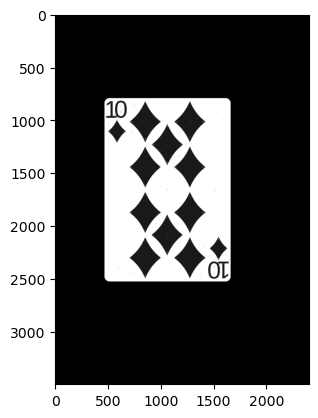

In [6]:
gray= cv2.cvtColor(card, cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()
key_points = sift.detect(gray, None)

test = cv2.drawKeypoints(gray, key_points, card)

plt.imshow(test)


## Method 2 - Template Matching

#### 1 - Card Detection

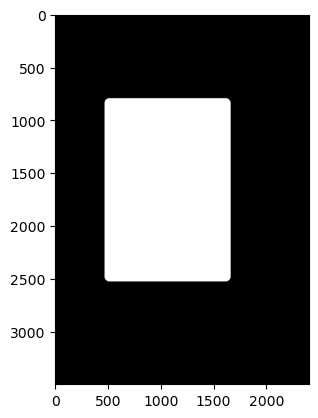

In [433]:
def get_card_contour(card, contours, area_threshold=1500000):
    area_threshold = card.shape[0] * card.shape[1] * 0.10 # the area of the contour should atleast be 10% of the image area.
    card_contours = []
    for contour in contours:
        if cv2.contourArea(contour) > area_threshold:
            perimeter = cv2.arcLength(contour, True) #??
            polygon = cv2.approxPolyDP(contour, 0.04*perimeter, True) #??
            if len(polygon) == 4:
                card_contours.append(contour)
    return card_contours

def detect_card(image):
    threshold = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    _, threshold = cv2.threshold(threshold, 127, 255, cv2.THRESH_BINARY) # binarize the image
    contours, _ = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) # get the contours

    card_contour = get_card_contour(image, contours=contours)
    card_detected = threshold.copy()
    cv2.drawContours(card_detected, [card_contour[0]], -1, (255), thickness=cv2.FILLED)
    return card_detected, threshold, card_contour

card_detected, threshold, card_contour = detect_card(card)
plt.imshow(card_detected, cmap='gray')

In [406]:
# # threshold = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
# ret, threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
# contours, _ = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# mask = np.zeros_like(threshold)
# temp = threshold.copy()

# print(len(contours))
# c=0
# for contour in contours:
#     area = cv2.contourArea(contour)
#     if area < 1000000: # hyperparameter
#         cv2.drawContours(mask, [contour], -1, (255), thickness=cv2.FILLED)
#         x, y, w, h = cv2.boundingRect(contour)
#         temp[x: x+w, y: y+w] = 255
#         c += 1
#         # print(x, y, w, h)
#         # break


# # mask = 255 - mask
# # image2 = cv2.bitwise_and(gray, gray, mask=mask)

# plt.imshow(threshold, cmap='gray')

In [391]:
ret, threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [392]:
# https://stackoverflow.com/questions/62274412/cv2-approxpolydp-cv2-arclength-how-these-works

def get_card_contour(card, contours, area_threshold=1500000):
    card_contours = []
    for contour in contours:
        if cv2.contourArea(contour) > area_threshold:
            perimeter = cv2.arcLength(contour, True) #??
            polygon = cv2.approxPolyDP(contour, 0.04*perimeter, True) #??
            if len(polygon) == 4:
                card_contours.append(contour)
    return card_contours

card_contour = get_card_contour(card, contours=contours)

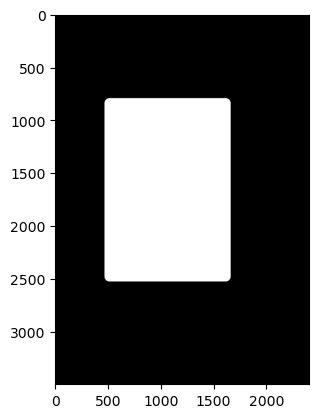

In [393]:
detected_card = gray.copy()
cv2.drawContours(detected_card, [card_contour[0]], -1, (255), thickness=cv2.FILLED)
plt.imshow(detected_card, cmap='gray')

### 2. Corner Finding

##### 2.1 - Canny Edge Detection & Hough Transform - To Find Lines

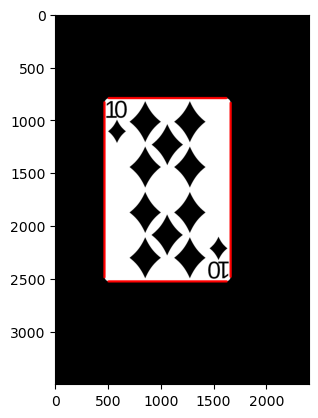

In [412]:
def convert_to_rgb(image):
    return cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

def find_lines(image):
    edges = cv2.Canny(image, 50, 150) # canny edge detector
    lines_xy = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=200) ### Hough Transform  - To Find Lines
    
    rgb_image = convert_to_rgb(image)

    for points in lines_xy:
        x1, y1, x2, y2 = points[0]
        cv2.line(rgb_image, (x1, y1), (x2, y2), (255, 0, 0), 20)
    return lines, rgb_image

lines, corner_image = find_lines(threshold)
plt.imshow(corner_image)


    


In [394]:
# edges = cv2.Canny(detected_card, 50, 150)
# lines = cv2.HoughLines(edges, 1, np.pi / 180, threshold=200)

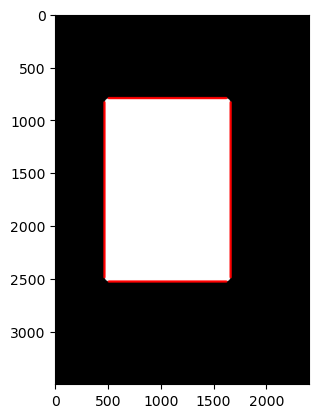

In [395]:
### Hough Transform  - To Find Lines

# https://www.geeksforgeeks.org/line-detection-python-opencv-houghline-method/

lines_xy = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=200)

rgb_image = detected_card.copy()
rgb_image = cv2.cvtColor(rgb_image, cv2.COLOR_GRAY2RGB)
test_image = rgb_image.copy()

for points in lines_xy:
    x1, y1, x2, y2 = points[0]
    cv2.line(test_image, (x1, y1), (x2, y2), (255, 0, 0), 20)

plt.imshow(test_image)

##### 2.2 - Find The Corners

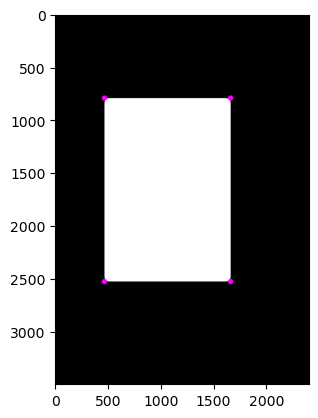

In [414]:
from itertools import combinations

def find_corners(lines):
    two_lines = list(combinations(lines, 2)) # a cartesian product of lines, taken two at a time
    corners = []
    for two_line in two_lines:
        line_a, line_b = two_line
        r_a, theta_a, r_b, theta_b = *line_a[0], *line_b[0] # r and theta - line in polar form
        cos_a, sin_a, cos_b, sin_b = np.cos(theta_a), np.sin(theta_a), np.cos(theta_b), np.sin(theta_b)
        determinative = cos_a * sin_b - sin_a * cos_b
        
        if determinative != 0: # lines are not parallel, parallel lines wont meet
            x = int((sin_b * r_a - sin_a * r_b) / determinative)
            y = int((-cos_b * r_a + cos_a * r_b) / determinative)
            corners.append((x, y))
    return corners

def mark_corners(image, corners):
    for corner in corners:
        cv2.circle(image, corner, 25, (255, 0, 255), -1)
    return image

corners = find_corners(lines)
corner_image = mark_corners(rgb_image, corners)
plt.imshow(corner_image)

In [396]:
# https://stackoverflow.com/questions/383480/intersection-of-two-lines-defined-in-rho-theta-parameterization/383527#383527
from itertools import combinations

two_lines = list(combinations(lines, 2))

corner_points = []
for two_line in two_lines:
    line_a, line_b = two_line
    r_a, theta_a, r_b, theta_b = *line_a[0], *line_b[0]
    
    cos_a, sin_a, cos_b, sin_b = np.cos(theta_a), np.sin(theta_a), np.cos(theta_b), np.sin(theta_b)
    determinative = cos_a * sin_b - sin_a * cos_b
    
    if determinative != 0: # lines are not parallel
        x = int((sin_b * r_a - sin_a * r_b) / determinative)
        y = int((-cos_b * r_a + cos_a * r_b) / determinative)
        corner_points.append((x, y))

corner_points
cornered_image = rgb_image.copy()
for corner in corner_points:
    cv2.circle(cornered_image, corner, 25, (255, 0, 255), -1)

plt.imshow(cornered_image)

[(467, 795), (467, 2530), (1659, 795), (1659, 2530)]

### 3) Corner Arrangement

The corner with the number was identified by finding the dark region inside of the card, whose centroid was closest to a corner.  
In all the standard cards, the dark region closest to a corner is the number or letter identifying the rank of the card.  
So the corner closest to the dark region’s centroid can then be marked as the first corner.  
From there, Euclidean distance between the corners is used to find the short edge and the second corner.

In [420]:
def pad_image(image, padding):
    return cv2.copyMakeBorder(image, padding, padding, padding, padding, cv2.BORDER_CONSTANT, value=(0, 0, 0))

cx, cy, w, h = cv2.boundingRect(card_contour[0])
card_region = threshold[cy: cy + h, cx: cx + w]
card_corners = [[0, 0], [w, 0], [0, h], [w, h]]
padding = 200
padded_image = pad_image(card_region, 200)
padded_image = convert_to_rgb(padded_image)

In [435]:
card_region.shape

(1734, 1192)

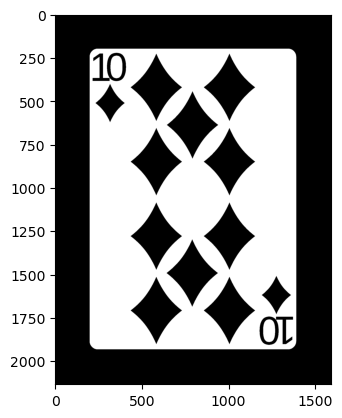

In [399]:
cx, cy, w, h = cv2.boundingRect(card_contour[0])
card_region = threshold[cy: cy + h, cx: cx + w]

padding_size = 200
image_with_padding = cv2.copyMakeBorder(card_region, padding_size, padding_size, padding_size, padding_size, cv2.BORDER_CONSTANT, value=(0, 0, 0))
card_corners = [[0, 0], [w, 0], [0, h], [w, h]]
plt.imshow(image_with_padding, cmap='gray')

In [400]:
card_corners

[[0, 0], [1192, 0], [0, 1734], [1192, 1734]]

In [432]:
def euclidean_distance(x1, y1, x2, y2):
    return np.sqrt((x1-x2)**2 + (y1-y2)**2)

def find_first_corner(card_corners, card_symbols_contour):
    min_corner, min_corner_distance = None, 1e10
    for contour in card_symbols_contour[1:]:
        cx, cy, _, _ = cv2.boundingRect(contour)
        for corner in card_corners:
            distance = euclidean_distance(cx, cy, *corner)
            if distance < min_corner_distance:
                min_corner, min_corner_distance = corner, distance
    return min_corner

def sort_corners(card_region, card_corners):
    card_symbols_contour, _ = cv2.findContours(card_region, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) # contour of symbols inside the card region

    # Find the corner which is more close to a contour/ symbol. 
    # The Top-Left/ Bottom-Right corner would be the lest distant for a standard deck of cards
    # for contour in card_symbols_contour[1:]:
    #     cx, cy, _, _ = cv2.boundingRect(contour)
    #     for corner in card_corners:
    #         distance = euclidean_distance(cx, cy, *corner)
    #         if distance < min_corner_distance:
    #             min_corner, min_corner_distance = corner, distance
    min_corner = find_first_corner(card_corners, card_symbols_contour)
    
    sorted_corners = []

    # check the distance between previously calculated minimum corner and the other 
    # corners and remove the least distant corner after adding it to the sorted list. 
    while True:
        print(min_corner, corner)
        corner_to_corner_distance = np.array([euclidean_distance(*min_corner, *corner) for corner in card_corners])
        print(corner_to_corner_distance)
        min_id = np.argsort(corner_to_corner_distance)[0] # index of corner with the minimum corner to corner distance
        min_corner = card_corners[min_id]
        sorted_corners.append(min_corner) # add the minimum corner to sorted list
        print('Corner = ', min_corner, 'FOUR CORNERS : ', card_corners)
        del card_corners[min_id] # remove the corner with minimum distance from the corners list.
        if len(card_corners) <1: # terminate after processing the last croner
            break
    
    return sorted_corners


def mark_sorted_corners(image, sorted_corners):
    font, font_scale, font_thickness, font_color = cv2.FONT_HERSHEY_SIMPLEX, 3, 10, (255, 0, 0) # creating font

    for id, corner in enumerate(sorted_corners):
        cv2.circle(test, corner, 100, (255, 0, 0), -1)
        cv2.putText(image, f'Corner {id}', (corner[0]+padding_size, corner[1]+padding_size), font, font_scale, font_color, font_thickness, cv2.LINE_AA)
    return image

sorted_corners = sort_corners(card_region, corners)
sorted_corners_image = mark_sorted_corners(padded_image, sorted_corners)
plt.imshow(sorted_corners_image)

None [0, 1734]
[]


IndexError: index 0 is out of bounds for axis 0 with size 0

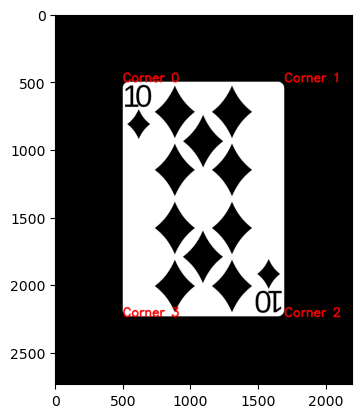

In [422]:
test = card_region.copy()
test = cv2.cvtColor(test, cv2.COLOR_GRAY2RGB)

# Create a font
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 3
font_thickness = 10
font_color = (255, 255, 255)

padding_size = 500
image_with_padding = cv2.copyMakeBorder(card_region, padding_size, padding_size, padding_size, padding_size, cv2.BORDER_CONSTANT, value=(0, 0, 0))
image_with_padding = cv2.cvtColor(image_with_padding, cv2.COLOR_GRAY2RGB)

for id, corner in enumerate(sorted_corners):
    cv2.circle(test, corner, 100, (255, 0, 0), -1)
    cv2.putText(image_with_padding, f'Corner {id}', (corner[0]+padding_size, corner[1]+padding_size), font, font_scale, (255, 0, 0), font_thickness, cv2.LINE_AA)

plt.imshow(image_with_padding)

In [401]:
def euclidean_distance(x1, y1, x2, y2):
    return np.sqrt((x1-x2)**2 + (y1-y2)**2)

four_corners = card_corners.copy()
min_corner, min_corner_distance = None, 1e10
card_symbols_contour, _ = cv2.findContours(card_region, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for contour in card_symbols_contour[1:]:
    cx, cy, _, _ = cv2.boundingRect(contour)
    for corner_id, corner in enumerate(four_corners):
        distance = euclidean_distance(cx, cy, *corner)
        if distance < min_corner_distance:
            min_corner, min_corner_distance = corner, distance


sorted_corners = []
while True:
    distances = np.array([euclidean_distance(*min_corner, *corner) for corner in four_corners])

    min_id = np.argsort(distances)[0]
    min_corner = four_corners[min_id]
    sorted_corners.append(min_corner)
    print('Corner = ', min_corner, 'FOUR CORNERS : ', four_corners)
    del four_corners[min_id] # remove the corner with minimum distance from the corners list.
    if len(four_corners) <1:
        break

Corner =  [0, 0] FOUR CORNERS :  [[0, 0], [1192, 0], [0, 1734], [1192, 1734]]
Corner =  [1192, 0] FOUR CORNERS :  [[1192, 0], [0, 1734], [1192, 1734]]
Corner =  [1192, 1734] FOUR CORNERS :  [[0, 1734], [1192, 1734]]
Corner =  [0, 1734] FOUR CORNERS :  [[0, 1734]]


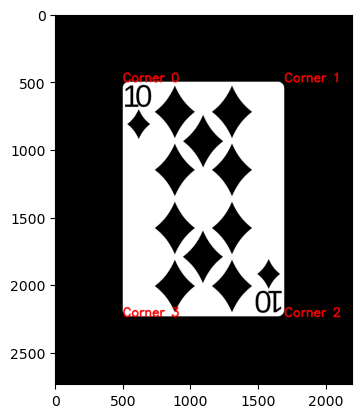

In [402]:
test = card_region.copy()
test = cv2.cvtColor(test, cv2.COLOR_GRAY2RGB)

# Create a font
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 3
font_thickness = 10
font_color = (255, 255, 255)

padding_size = 500
image_with_padding = cv2.copyMakeBorder(card_region, padding_size, padding_size, padding_size, padding_size, cv2.BORDER_CONSTANT, value=(0, 0, 0))
image_with_padding = cv2.cvtColor(image_with_padding, cv2.COLOR_GRAY2RGB)

for id, corner in enumerate(sorted_corners):
    cv2.circle(test, corner, 100, (255, 0, 0), -1)
    cv2.putText(image_with_padding, f'Corner {id}', (corner[0]+padding_size, corner[1]+padding_size), font, font_scale, (255, 0, 0), font_thickness, cv2.LINE_AA)

plt.imshow(image_with_padding)

### 4 - Transform creation